In [38]:
import jpt
from jpt import (
    austin,
    buzzy,
    load_jeopardy_dataset,
    jeopardy_benchmark,
    evaluate_jeopardy_benchmarks,
    plot_evaluations
)
from util import ws
import pandas as pd
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
jeopardy_data = load_jeopardy_dataset(remove_unfair=True)

In [31]:
old_benchmark_results_df = pd.read_csv(os.path.join(jpt.JEOPARDY_DATA_DIR, r'all_benchmark_results_2024-05-14.csv'))
old_benchmark_results_df.shape

(16000, 8)

In [10]:
austin_benchmark_results_df1 = jeopardy_benchmark(
    contestant=austin,
    dataset=jeopardy_data,
    verbose=True,
    sample_size=10)

Category: MOTHERS OF INVENTION
Clue: Teri Pall claimed the 1965 invention of this device that had a range of 2 miles; we don't know if it was a 900 MHz
Answer: a cordless phone
Contestant: What is the cordless telephone?
Alex: Correct! The cordless telephone is indeed the correct response.

Category: MUSICALS
Clue: "The Color Purple" takes place in this "peachy" Southern state, & it premiered there before it came to Broadway
Answer: Georgia
Contestant: What is Georgia?
Alex: Correct!

Category: WORLD HISTORY
Clue: In 1812 Napoleon's Grand Army of 614,000 invaded this country; months later only 40,000 were left
Answer: Russia
Contestant: What is Russia?
Alex: Correct!

Category: JUNGLE POTPOURRI
Clue: This comic "Lion King" pair have their own CD-ROM called "Jungle Games"
Answer: Timon & Pumbaa
Contestant: Who are Timon and Pumbaa?
Alex: Correct!

Category: CECIL
Clue: Cecil Day founded this motel chain in 1970
Answer: Days Inn
Contestant: What is Days Inn?
Alex: Correct!

Category: SIB

In [11]:
buzzy_benchmark_results_df1 = jeopardy_benchmark(
    contestant=buzzy,
    dataset=jeopardy_data,
    verbose=True,
    sample_size=10)

Category: CHRISTMAS CUSTOMS
Clue: A treasured history tradition in New York City is ice-skating beneath the giant Christmas tree in this plaza
Answer: Rockefeller Plaza
Contestant: What is Rockefeller Plaza?
Alex: Correct!

Category: "G" MEN
Clue: In the 1970s this future veep was a reporter for the Tennessean newspaper
Answer: (Al) Gore
Contestant: Who is Al Gore?
Alex: Correct! Al Gore is the right answer.

Category: A PEANUTS TIMELINE
Clue: September 24, 1990:<br />This hygiene-challenged boy runs for class president
Answer: Pigpen
Contestant: Who is Pigpen?
Alex: Correct!

Category: TV PARENTS
Clue: Can we talk?  This comedienne guest-starred as Kathy Griffin's wacky mom on "Suddenly Susan"
Answer: Joan Rivers
Contestant: Who is Joan Rivers?
Alex: Correct! Joan Rivers is indeed the answer.

Category: THE PATRIOT LEAGUE
Clue: Isaac Hull captained this ship in 1812 as cannonballs from the frigate Guerriere bounced off it
Answer: the USS Constitution ("Old Ironsides")
Contestant: What

In [21]:
austin_benchmark_results_df2 = jeopardy_benchmark(
    contestant=austin,
    dataset=jeopardy_data,
    sample_size=490)

..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [22]:
buzzy_benchmark_results_df2 = jeopardy_benchmark(
    contestant=buzzy,
    dataset=jeopardy_data,
    sample_size=490)

..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [37]:
buzzy_benchmark_results_df3 = jeopardy_benchmark(
    contestant=buzzy,
    dataset=jeopardy_data,
    sample_size=1500)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [38]:
austin_benchmark_results_df3 = jeopardy_benchmark(
    contestant=austin,
    dataset=jeopardy_data,
    sample_size=1500)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [39]:
new_benchmark_results_df = pd.concat([
    austin_benchmark_results_df1,
    austin_benchmark_results_df2,
    austin_benchmark_results_df3,
    buzzy_benchmark_results_df1,
    buzzy_benchmark_results_df2,
    buzzy_benchmark_results_df3,
])

In [40]:
all_benchmark_results_df = pd.concat([
    old_benchmark_results_df, 
    new_benchmark_results_df
])
all_benchmark_results_df.shape

(20000, 8)

In [41]:
jeopardy_benchmark_evaluations_df = evaluate_jeopardy_benchmarks(all_benchmark_results_df)
jeopardy_benchmark_evaluations_df

,label,successes,failures,sample_size,success_rate,standard_error,name
1,ken,1924,76,2000,0.9620,0.004288,Ken Jennings\ngpt-4-turbo
9,buzzy,1924,76,2000,0.9620,0.004288,Buzzy Cohen\ngpt-4
7,cris,1917,83,2000,0.9585,0.004471,Cris Pannullo\ngpt-4o
8,austin,1913,87,2000,0.9565,0.004573,Austin Rogers\ngpt-4\nRAG
0,amy,1856,144,2000,0.9280,0.005788,Amy Schneider\ngpt-3.5\nfine-tuned
5,james,1791,209,2000,0.8955,0.006846,James Holzhauer\ngpt-3.5-turbo
4,brad,1790,210,2000,0.8950,0.006860,Brad Rutter\nllama3:70b
6,mattea,1567,433,2000,0.7835,0.009212,Mattea Roach\nllama3:8b\nRAG
2,larissa,1257,743,2000,0.6285,0.010805,Larissa Kelly\nllama3:8b
3,david,1196,804,2000,0.5980,0.010964,David Madden\nllama2:7b


In [42]:
df = jeopardy_benchmark_evaluations_df.copy()
df.reset_index(drop=True, inplace=True)

# split name/model into separate columns
name_split = df['name'].str.split('\n', expand=True)
df.insert(0, 'variation', name_split[2])
df.insert(0, 'model', name_split[1])
df.insert(0, 'Contestant', name_split[0])
df.drop(columns=['label', 'name'], inplace=True)

# formatting
df['successes'] = df['successes'].apply(lambda x: f'{x:,}')
df['failures'] = df['failures'].apply(lambda x: f'{x:,}')
df['sample_size'] = df['sample_size'].apply(lambda x: f'{x:,}')
df['success_rate'] = df['success_rate'].apply(lambda p: f'{p*100:0.2f}%')
df['standard_error'] = df['standard_error'].apply(lambda p: f'±{p*196:0.2f}%')

df.columns = ['Contestant', 'Model', 'Variation', 'Successes', 'Failures', 'Sample Size', 'Success Rate', '95% CI']
print(df.to_markdown(index=False))

| Contestant      | Model         | Variation   | Successes   |   Failures | Sample Size   | Success Rate   | 95% CI   |
|:----------------|:--------------|:------------|:------------|-----------:|:--------------|:---------------|:---------|
| Ken Jennings    | gpt-4-turbo   |             | 1,924       |         76 | 2,000         | 96.20%         | ±0.84%   |
| Buzzy Cohen     | gpt-4         |             | 1,924       |         76 | 2,000         | 96.20%         | ±0.84%   |
| Cris Pannullo   | gpt-4o        |             | 1,917       |         83 | 2,000         | 95.85%         | ±0.88%   |
| Austin Rogers   | gpt-4         | RAG         | 1,913       |         87 | 2,000         | 95.65%         | ±0.90%   |
| Amy Schneider   | gpt-3.5       | fine-tuned  | 1,856       |        144 | 2,000         | 92.80%         | ±1.13%   |
| James Holzhauer | gpt-3.5-turbo |             | 1,791       |        209 | 2,000         | 89.55%         | ±1.34%   |
| Brad Rutter     | llama3:70b  

In [9]:
eval_filename = os.path.join(jpt.JEOPARDY_DATA_DIR, 'jeopardy_benchmark_evaluations_2024-05-17.csv')
jeopardy_benchmark_evaluations_df = pd.read_csv(eval_filename)

benchmark_filename = os.path.join(jpt.JEOPARDY_DATA_DIR, 'all_benchmark_results_2024-05-17.csv')
all_benchmark_results_df = pd.read_csv(benchmark_filename)

(0.8, 1.0)

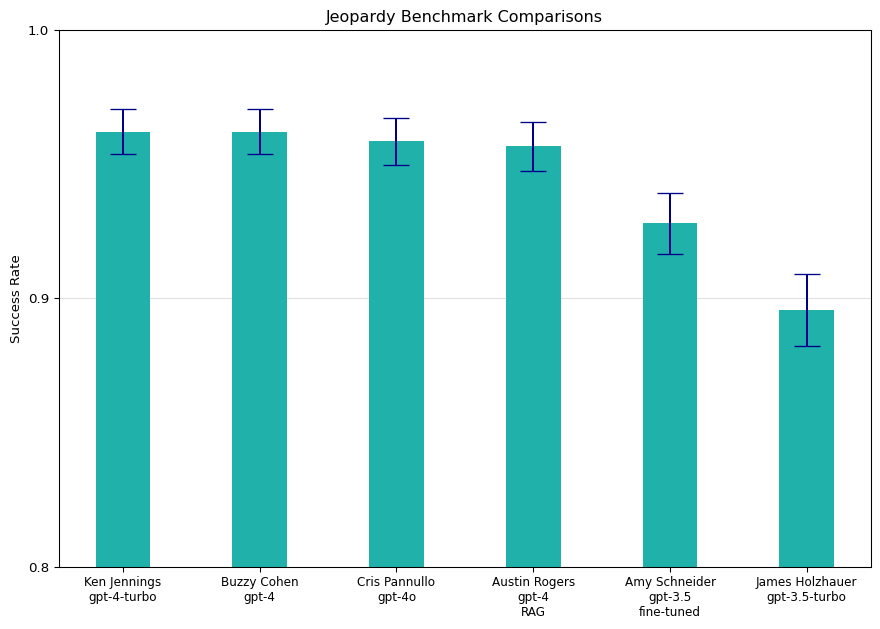

In [7]:
# Plotting the bar chart with error bars

gpt_models = jeopardy_benchmark_evaluations_df['name'].str.contains('\ngpt-')
gpt_benchmark_evaluations_df = jeopardy_benchmark_evaluations_df[gpt_models]
plot_evaluations(gpt_benchmark_evaluations_df)
import matplotlib.pyplot as plt
plt.ylim(0.8, 1)

In [44]:
# from util import now
# timestamp = now(False)
# eval_filename = os.path.join(jpt.JEOPARDY_DATA_DIR, f'jeopardy_benchmark_evaluations_{timestamp}.csv')
# print('wrote', eval_filename)
# jeopardy_benchmark_evaluations_df.to_csv(eval_filename, index=False)

# benchmark_filename = os.path.join(jpt.JEOPARDY_DATA_DIR, f'all_benchmark_results_{timestamp}.csv')
# all_benchmark_results_df.to_csv(benchmark_filename, index=False)
# print('wrote', benchmark_filename)

wrote C:\Users\oloon\Dropbox\data\jeopardy\jeopardy_benchmark_evaluations_2024-05-17.csv
wrote C:\Users\oloon\Dropbox\data\jeopardy\all_benchmark_results_2024-05-17.csv


In [36]:
used_gpt4 = all_benchmark_results_df['label'].apply(lambda label: 'gpt-4' in jpt.CONTESTANT_NAME_MAP[label])
incorrect = all_benchmark_results_df['correct'] == False
errors = all_benchmark_results_df[ used_gpt4 & incorrect ]
print(errors.shape)
pd.set_option('display.max_colwidth', None)
errors.sample(10)

(322, 8)


,label,category,question,value,answer,contestant_answer,judgement,correct
18621,buzzy,NOT A VERB,"'Capable,<br />succeed,<br />accomplish'",200.0,capable,"What is ""accomplish""?","Incorrect. The correct response was ""What is capable?""",False
15493,cris,3-LETTER WORDS,"'A sailor may be a tar or this, also a mass or a lump'",1600.0,gob,What is a tar?,"Incorrect. The correct response was ""What is gob?""",False
477,ken,VANS,"'Columnist Abigail, who opposes smoking, or president Martin, who opposed the annexation of Texas'",200.0,Van Buren,Who are Van Buren and Van?,"Incorrect. The correct response was ""Van Buren.""",False
395,ken,WHAT'S COOKIN'?,'The U.S. Senate has its own recipe for a soup made from this legume',500.0,Navy bean soup,What is bean soup?,"Incorrect. The correct response was ""What is Navy bean soup?""",False
15006,cris,FOUR!,"'In the English alphabet, it's the fourth consonant'",200.0,F,What is D?,"Incorrect. The correct response is ""What is F?""",False
16699,austin,"TO THE ""NTH"" DEGREE",'If you're an architect you may want to base your column on one',800.0,plinth,What is the Nth order?,"Incorrect. The correct response was, ""What is a plinth?""",False
19712,buzzy,4 STRAIGHT VOWELS,"'""The moan of doves in immemorial elms, and murmuring of innumerable bees"" is an example of this literary device'",2000.0,onomatopoeia,What is assonance?,"Incorrect. The correct response was ""What is onomatopoeia?""",False
19933,buzzy,MIDDLE NAMES,'A Chief Justice:<br />Hubbs',1600.0,William H. Renquist,Who is Warren Earl Burger?,"Incorrect. The correct response was, ""Who is William H. Rehnquist?""",False
14058,cris,ANAGRAMMED FOOD & DRINK,"'If you're watching your carbs, eat these plain, not in cakes'",2000.0,crabs (from carbs),What are pancakes?,"Incorrect. The correct response was ""What are crabs?"" from the anagram of ""carbs.""",False
17132,austin,PICTURE ME!,'He went from peasant to party chairman & prime minister',800.0,Nikita Khrushchev,Who is Mao Zedong?,"Incorrect. The correct response was ""Who is Nikita Khrushchev?""",False


In [12]:
all_benchmark_results_df.columns

Index(['label', 'category', 'question', 'value', 'answer', 'contestant_answer',
       'judgement', 'correct'],
      dtype='object')

In [20]:
austin('TO THE "NTH" DEGREE', "'If you're an architect you may want to base your column on one'\n\nHINT: The category gives you letters the correct answer must contain, the clue tells you the topic or meaning of the word.")

'What is the Corinthian?'

In [24]:
austin('ON THE LANDSCAPE', "'It's an open space in the forest, or an air freshener from Drackett'")

'What is a meadow?'

In [22]:
austin('ON THE LANDSCAPE', "'It's an open space in the forest, or an air freshener from Drackett'\n\nHINT: Come up with 5 possible responses. Then return the one that best answers both part of the clue")

'What is a glade?'

In [25]:
austin('ON THE LANDSCAPE', "'It's an open space in the forest, or an air freshener from Drackett'\n\nHINT: Come up with 5 possible responses. Then return the one that best answers both part of the clue")

'What is a Glade?'

In [30]:
anagram_hint = "\n\nHINT: For anagrams, first write out the word as separate uppercase letters, for example: 'debit card' -> 'D E B I T C A R D' -> 'BAD CREDIT'"
austin('ANAGRAMS', "'Miguel called Ramon cool; I think he's this, as his therapist might suggest'" + anagram_hint)

'What is "neurotic"?'

In [32]:
austin('ANAGRAMS', "'Ann never wears any gem paler than this one'" + anagram_hint + "\n\nHINT: the word to anagram is 'pearl'.")

'What is "panel"?'

In [35]:
# typo in question!
austin('IN THE TREASURY DEPT.', "This service's quarantines animals & can stop you from bringing sausages into the country")

'What is the U.S. Customs and Border Protection?'

In [75]:
error_sample = errors.sample(100)

In [82]:
%load_ext autoreload
%autoreload 2
import jpt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
@jpt.retry_decorator
def gpt4(prompt: str) -> str:
    '''Generic call to OpenAI's API.'''

    chat_response = jpt.client.chat.completions.create(
        model="gpt-4-turbo",
        temperature=0.0,
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ]
    )
    content = chat_response.choices[0].message.content
    return content

In [86]:
judgements = []

from tqdm.notebook import tqdm

for id, question in tqdm(list(error_sample.iterrows())):
    category = question['category']
    clue = question['question']
    answer = question['answer']
    formatted_question = (
        f"Category: {category}\n"
        f"Clue: {clue}\n"
        f"Correct Answer: {answer}\n"
    )
    # print(formatted_question)
    prompt = (
        "Find mistakes in this Jeopardy! question:\n"
        f"{formatted_question}"
        "\n"
        "Rubric:\n"
        "If the question cannot be answered because of a missing audio reference, begin your answer with 'AUDIO'.\n"
        "If the question cannot be answered because of a missing image or video reference, begin your answer with 'VISUAL'.\n"
        "If the question has no serious errors, answer with the single word 'NONE' and nothing else.\n"
        "Answer in one word and only one word. Your answer must be AUDIO, VISUAL, or NONE. No other answers are acceptable.\n"
    )
    fairness = jpt.gpt4(prompt)
    # print(fairness)
    judgements.append({'id': id, 'category': category, 'clue': clue, 'answer': answer, 'fairness': fairness })

Output()

In [87]:
judgements_df = pd.DataFrame.from_records(judgements)
audio = judgements_df['fairness'] == 'AUDIO'
visual = judgements_df['fairness'] == 'VISUAL'
judgements_df[ audio | visual ]

,id,category,clue,answer,fairness
9,14049,FOR BIRD BRAINS,"'Named for a prominent feature, it's the bird seen here'",the Roseate Spoonbill,VISUAL
10,14680,THE LIQUOR CABINET,"'It's smooth sailing for this brand of smooth Scotch whisky, whose logo is seen here'",Cutty Sark,VISUAL
11,17824,NAMES IN THE NUDE,'Actress seen here on a Times Square billboard from People for the Ethical Treatment of Animals',Pamela Anderson Lee,VISUAL
20,18429,SPELL IT OUT FOR ME!,'We'll all sing your praises when you spell...',C-H-O-I-R,AUDIO
61,18067,PULL,"'Word on the 2 buttons that preceded this one:<br />(Curly in a ""Three Stooges"" clip showing a button marked ""Pull"")'",Press,VISUAL
68,19313,SEASONS,"'This herb helped cure the treat seen here, so the herb's in its name'",Dill (pickle),VISUAL
71,17957,TECH TV,"'It's the workhorse fighter plane profiled here in ""Future Fighting Machines""'",F-15 (the Eagle),AUDIO
73,453,"""RAP"" SHEET","'""I'm Not"" this guy in a Tony Award-winning play from 1986'",Rappaport,AUDIO
